   > ## Importation des librairies:

In [ ]:
## Algorithme basé sur:
## -Normalisation manuelle
## -BDD de 37 équipes
## -Suppression des deux variables : Supporters et joueurs formés club

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

> ## Importation des algorithmes:

In [2]:
from sklearn import datasets, linear_model #sklearn est une mine d'or pour faire du machine learning dans Python.
from sklearn.metrics import mean_squared_error

> ## Importation du jeu de donnees et description:

In [3]:
#J'importe mon jeu de données.Il s'agit ici d'un jeu de données e-commerce importé depuis mon ordinateur (pas depuis sklearn)
GA = pd.read_excel (r"C:\Users\tangu\OneDrive\Bureau\Python\BDD_Football_37_manu_sans var.xlsx")

In [4]:
#Regardons à quoi ressemble le jeu de données en question.
GA.head(10)

,CLUB,Perf,Budget transfert,Valeur club,Age équipe,Prix équipe
0,Real Madrid,1.000000,0.708148,0.837209,0.958507,0.915749
1,Bayern,0.836842,0.534815,0.709302,0.932755,0.779721
2,Barcelone,0.826316,0.602222,0.821705,0.946470,0.999996
3,Atlético Madrid,0.621053,0.302963,0.668992,0.917593,0.776220
4,Chelsea,0.592105,0.566667,0.655039,0.917998,0.893489
5,Juventus,0.565789,0.466667,0.590698,0.999595,0.688582
6,Manchester U,0.555263,1.000000,0.620155,0.862211,0.745528
7,PSG,0.539474,0.942222,0.782946,0.928530,0.852149
8,Porto,0.500000,0.194074,0.210078,0.939120,0.273918
9,Manchester City,0.494737,0.960741,1.000000,0.941609,0.996998


In [5]:
#Quelle est la taille du jeu de données?
GA.shape

(37, 6)

In [6]:
#Ici, je vérifie que je n'ai pas de données manquantes.
GA.isnull().sum()

CLUB                0
Perf                0
Budget transfert    0
Valeur club         0
Age équipe          0
Prix équipe         0
dtype: int64

In [7]:
GA.dtypes ## format des variables

CLUB                 object
Perf                float64
Budget transfert    float64
Valeur club         float64
Age équipe          float64
Prix équipe         float64
dtype: object

In [8]:
print (GA.columns)

Index(['CLUB', 'Perf', 'Budget transfert', 'Valeur club', 'Age équipe',
       'Prix équipe'],
      dtype='object')


In [9]:
GA.describe()
#Ici, je sors les valeurs clés pour chacune de mes données. 

,Perf,Budget transfert,Valeur club,Age équipe,Prix équipe
count,37.000000,37.000000,37.000000,37.000000,37.000000
mean,0.414794,0.303063,0.395789,0.902144,0.460830
std,0.194561,0.262330,0.272980,0.047077,0.291714
min,0.144737,0.056296,0.040310,0.802083,0.068078
25%,0.242105,0.103704,0.162016,0.864583,0.218552
50%,0.389474,0.211852,0.324806,0.917072,0.379307
75%,0.494737,0.401481,0.620155,0.933738,0.745528
max,1.000000,1.000000,1.000000,0.999595,0.999996


> ## Définition de la variable à prédire:

In [10]:
X = GA.iloc[:,2:8] ## On définit que X prend l'ensemble des variables de la colonne 2 à 8.
X.head() ## On affiche le tableau avec les valeurs sélectionnés.

,Budget transfert,Valeur club,Age équipe,Prix équipe
0,0.708148,0.837209,0.958507,0.915749
1,0.534815,0.709302,0.932755,0.779721
2,0.602222,0.821705,0.946470,0.999996
3,0.302963,0.668992,0.917593,0.776220
4,0.566667,0.655039,0.917998,0.893489


In [11]:
Y=GA.Perf ## On définit que Y prend la colonne Perf du jeu de données GA.
Y.head() ## On affiche le tableau avec les valeurs sélectionnés.

0    1.000000
1    0.836842
2    0.826316
3    0.621053
4    0.592105
Name: Perf, dtype: float64

> ## Exploration des donnees ou EDA: Exploratory Data Analysis:

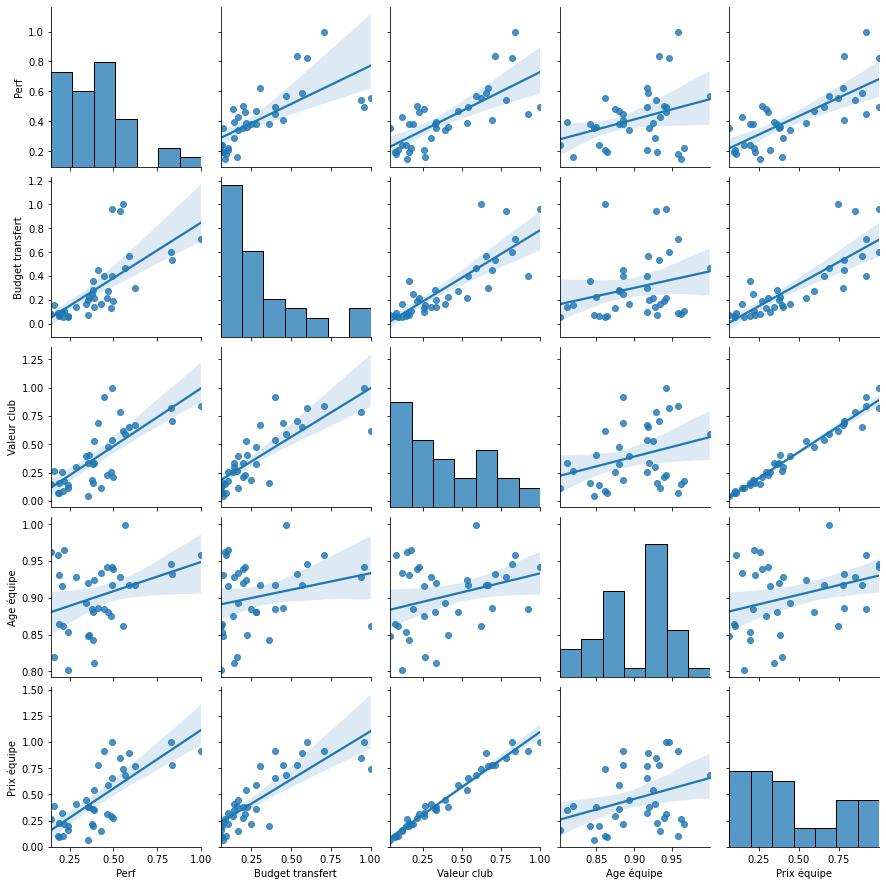

In [12]:
sns.pairplot(GA, kind="reg") #Observons la linearite ou pas de toutes nos variables les unes comparees aux autres.

In [13]:
GA.describe()

,Perf,Budget transfert,Valeur club,Age équipe,Prix équipe
count,37.000000,37.000000,37.000000,37.000000,37.000000
mean,0.414794,0.303063,0.395789,0.902144,0.460830
std,0.194561,0.262330,0.272980,0.047077,0.291714
min,0.144737,0.056296,0.040310,0.802083,0.068078
25%,0.242105,0.103704,0.162016,0.864583,0.218552
50%,0.389474,0.211852,0.324806,0.917072,0.379307
75%,0.494737,0.401481,0.620155,0.933738,0.745528
max,1.000000,1.000000,1.000000,0.999595,0.999996


> ## Demarrage de la phase de test:

In [14]:
from sklearn.model_selection import train_test_split 

> ## **C'est la ou la partie learning de Machine Learning rentre en scene!**

Remarquez aussi **split**, cela signifie que l'on va diviser notre jeu de donnee en deux: une partie pour la premiere phase qui correspond a la phase d'**l'entrainement** de la machine et l'autre partie pour **tester** si ce que la machine aura appris est fiable.

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42) 

In [16]:
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

(18, 4)
(19, 4)
(18,)
(19,)


> ## Installation du modele de regression lineaire sur le jeu de donnees:

In [17]:
# On cree une instance de notre modele
lm1 = linear_model.LinearRegression()

#On fit/installe notre modele sur notre jeu de donnees.
lm1.fit(X_train, Y_train)

LinearRegression()

In [18]:
print (lm1.coef_)#Interpreter la signification des coefficients

[ 0.16825282 -0.85592884 -0.88500894  1.27349209]


In [19]:
print (lm1.intercept_) 
# sans aucune influence des facteurs budget transfert, valeur club etc... l'indice de performance est de 0,92

0.9271417710127352


In [20]:
pred1 = lm1.predict(X_test)
#Ici, on sort les 10 premieres valeurs predites par notre learning post apprentissage.
print(lm1.predict(X_test[0:10]))

[0.39262146 0.32932404 0.78723333 0.22000862 0.50284998 0.3943029
 0.75094606 0.38568915 0.34061871 0.62126426]


> ## Evaluation du modele:

> ### 1) Calcul de l'erreur du modele:

In [21]:
print (np.sqrt(mean_squared_error(Y_test, pred1))) ## marge d'erreur, donné dans l'unité de mesure de notre jeu de données (%)

0.16802079333084055


> ### 2) Calcul du score du modele:

In [22]:
score1=lm1.score(X_test,Y_test)
print (score1)
## Le R2 est de 18,2% ==> faible mais cohérent à la vue de notre jeu de données

0.1821980846428548


> ### 3) Calcul de l'erreur du modele de base:

In [23]:
#baseline prediction 
baseline=np.mean(Y_test)
baseline

0.4221606648199446

In [24]:
baseline_pred=np.empty(len(Y_test))# cree un nouveau tableau
baseline_pred.fill(baseline) #rempli avec predictions
print(np.sqrt(mean_squared_error(Y_test,baseline_pred)))
## Correspond à la marge d'erreur du modèle, plus élevé que notre R2 = bon

0.18579711634613183


In [25]:
print(Y_test, baseline_pred)
#Ici, on sort les valeurs predies versus la moyenne

17    0.392105
13    0.463158
4     0.592105
29    0.221053
35    0.163158
25    0.342105
6     0.555263
26    0.286842
24    0.352632
16    0.410526
8     0.500000
15    0.431579
12    0.468421
32    0.192105
9     0.494737
19    0.384211
0     1.000000
31    0.205263
5     0.565789
Name: Perf, dtype: float64 [0.42216066 0.42216066 0.42216066 0.42216066 0.42216066 0.42216066
 0.42216066 0.42216066 0.42216066 0.42216066 0.42216066 0.42216066
 0.42216066 0.42216066 0.42216066 0.42216066 0.42216066 0.42216066
 0.42216066]


In [26]:
GA.corr()

,Perf,Budget transfert,Valeur club,Age équipe,Prix équipe
Perf,1.000000,0.689876,0.729949,0.328402,0.744565
Budget transfert,0.689876,1.000000,0.828066,0.249812,0.829243
Valeur club,0.729949,0.828066,1.000000,0.298025,0.984828
Age équipe,0.328402,0.249812,0.298025,1.000000,0.324580
Prix équipe,0.744565,0.829243,0.984828,0.324580,1.000000


### > Interpretation ###